In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns
import matplotlib
import os
plt.rcParams.update(matplotlib.rcParamsDefault)
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]

semi_balck = '#4F6272'#%%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns
import matplotlib

plt.rcParams.update(matplotlib.rcParamsDefault)
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]

semi_balck = '#4F6272'

In [2]:
results_path = "/Volumes/noamaz/modularity/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")



In [3]:
plot_path = f"{local_base_path}/plots/all_togther"
task = "retina_xor"
num_layers = '3'
retina_res_folder = f"{task}/retina_{num_layers}_layers"
retina_lgb_res_path = f"{results_path}/{retina_res_folder}/lightgbm_feature_selection/"
retina_all_features_folder = 'exp_2023-11-27-15-51-15_nice_features'

In [4]:
task = "xor"
num_layers = "4"
xor_res_folder = f"{task}/{task}_{num_layers}_layers"
xor_lgb_res_path = f"{results_path}/{xor_res_folder}/lightgbm_feature_selection/"
xor_all_features_folder = 'exp_2023-11-16-17-38-02_nice_features'

In [5]:
task = "digits"
num_layers = '3'
digit_res_folder = f"{task}/digits_{num_layers}_layers"
digit_lgb_res_path = f"{results_path}/{digit_res_folder}/lightgbm_feature_selection/"
digit_all_features_folder = 'exp_2023_11_27_11_00_0_nice_features'


In [6]:
res = {
}
all_features_res = {}
for task_dir, task, all_f in zip([retina_lgb_res_path, xor_lgb_res_path, digit_lgb_res_path], ['retina', "xor", 'digits',], [retina_all_features_folder, xor_all_features_folder, digit_all_features_folder]):
    df = pd.DataFrame()
    for file in os.listdir(f'{task_dir}/{all_f}'):
        if '._' in file:
            continue
        if 'all_exp_mape_prediction_results' not in file:
            continue
        if '2023-12-24' not in file:
            continue
        all_features_res[task] = pd.read_csv(f'{task_dir}/{all_f}/{file}').dropna().sort_values([ 'num_features'])
    for sub_folder in os.listdir(f"{task_dir}/by_globality"):
        if 'glob_' not in sub_folder:
            continue
        glob_ind = sub_folder.split('glob_')[1].replace('_', '.')
        for file in os.listdir(f"{task_dir}/by_globality/{sub_folder}"):
            if '._' in file:
                continue
            if 'exp_mape_prediction' not in file:
                continue
            temp = pd.read_csv(f"{task_dir}/by_globality/{sub_folder}/{file}")
            temp['glob_ind'] = [glob_ind]*temp.shape[0]
            df = pd.concat([df, temp], ignore_index=True)
    df=df.sort_values(['glob_ind', 'num_features'])
    res[task] = df.drop_duplicates(subset=['glob_ind', 'num_features', 'test_mape']).dropna()


In [7]:
all_features_res['xor']

,Unnamed: 0,exp_name,num_features,train_mape,train_mape_var,test_mape,test_mape_var
13,13,2023-11-16-17-38-02_masked_data_1_features,1,0.036745,0.001262,0.036941,0.001265
8,8,2023-11-16-17-38-02_masked_data_2_features,2,0.029669,0.000836,0.029649,0.000828
17,17,2023-11-16-17-38-02_masked_data_3_features,3,0.027079,0.000762,0.027159,0.000758
16,16,2023-11-16-17-38-02_masked_data_4_features,4,0.023022,0.000679,0.023279,0.000695
2,2,2023-11-16-17-38-02_masked_data_5_features,5,0.021381,0.000447,0.021869,0.000468
15,15,2023-11-16-17-38-02_masked_data_6_features,6,0.021702,0.000412,0.022149,0.000442
5,5,2023-11-16-17-38-02_masked_data_7_features,7,0.020691,0.000383,0.021177,0.000410
14,14,2023-11-16-17-38-02_masked_data_8_features,8,0.017760,0.000356,0.018531,0.000380
0,0,2023-11-16-17-38-02_masked_data_9_features,9,0.018270,0.000334,0.019113,0.000370
1,1,2023-11-16-17-38-02_masked_data_10_features,10,0.016794,0.000307,0.017684,0.000337


In [8]:
res['xor']

,Unnamed: 0,exp_name,num_features,train_mape,train_mape_var,test_mape,test_mape_var,glob_ind
12,0,2023-11-17-13-36-48_masked_data_1_features,1,0.115154,0.006620,0.114931,0.006644,0
16,4,2023-11-17-13-36-48_masked_data_2_features,2,0.098940,0.005521,0.098890,0.005517,0
17,5,2023-11-17-13-36-48_masked_data_3_features,3,0.074933,0.004571,0.075421,0.004778,0
14,2,2023-11-17-13-36-48_masked_data_4_features,4,0.053325,0.002807,0.054584,0.002884,0
22,10,2023-11-17-13-36-48_masked_data_5_features,5,0.045125,0.002170,0.047129,0.002345,0
19,7,2023-11-17-13-36-48_masked_data_6_features,6,0.033464,0.001309,0.038511,0.001790,0
23,11,2023-11-17-13-36-48_masked_data_7_features,7,0.023316,0.000673,0.035332,0.001570,0
15,3,2023-11-17-13-36-48_masked_data_8_features,8,0.015127,0.000235,0.031373,0.001114,0
21,9,2023-11-17-13-36-48_masked_data_9_features,9,0.009909,0.000095,0.029726,0.001014,0
18,6,2023-11-17-13-36-48_masked_data_10_features,10,0.007694,0.000053,0.027154,0.000910,0


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_32492/1438503735.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = res['xor'][feature_selection_res_by_glob['glob_ind'] == str(ind)][


KeyError: 'best mape train'

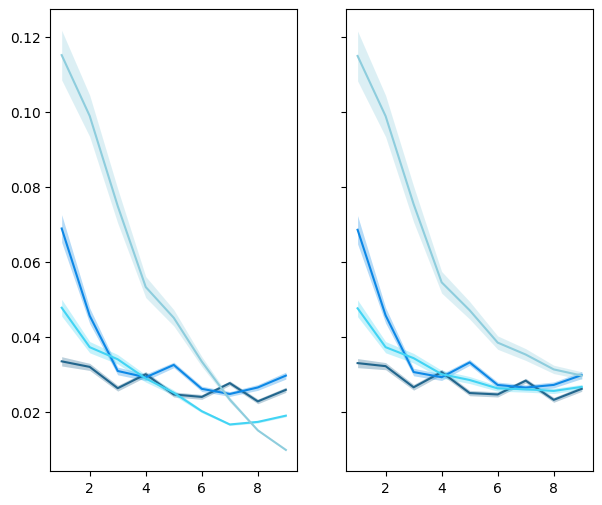

In [9]:
glob_levels =  {
    1: "Network level features",
    0.75: "Layer level features",
    0.5: "Neurons level feature",
    0: "Local features"
}
sorted_blues = ["#22668D", "#0d88e6", "#42d4f4", "#8ECDDD", ]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_levels.keys()):
    feature_selection_res_by_glob = res['xor']
    res_per_glob = res['xor'][feature_selection_res_by_glob['glob_ind'] == str(ind)][
        feature_selection_res_by_glob['num_features'] <= 9]
    ax1.plot(res_per_glob['num_features'], res_per_glob['train_mape'], label=f"{glob_levels[float(ind)]}",
             c=sorted_blues[i])
    ax1.fill_between(res_per_glob['num_features'], res_per_glob['train_mape']-res_per_glob['train_mape_var'], res_per_glob['train_mape']+res_per_glob['train_mape_var'],
    alpha=0.3, edgecolor='#3F7F4C', facecolor=sorted_blues[i],
    linewidth=0)
    ax2.plot(res_per_glob['num_features'], res_per_glob['test_mape'], label=f"{glob_levels[float(ind)]}",
             c=sorted_blues[i])
    ax2.fill_between(res_per_glob['num_features'], res_per_glob['test_mape']-res_per_glob['test_mape_var'], res_per_glob['test_mape']+res_per_glob['test_mape_var'],    alpha=0.3, edgecolor='#3F7F4C', facecolor=sorted_blues[i],
    linewidth=0)
small_all_fetaures_selcetion = all_features_res['xor'][all_features_res['xor']['num_features'] <= 9]
ax1.plot(range(1,10), small_all_fetaures_selcetion['best mape train'],
         label="All groups", c=semi_balck)
ax2.plot(range(1, 10), small_all_fetaures_selcetion['test mape ind'],label="All groups",
         c=semi_balck)
ax2.fill_between(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['test mape ind']-small_all_fetaures_selcetion['test mape ind var'], small_all_fetaures_selcetion['test mape ind']+small_all_fetaures_selcetion['test mape ind var'],    alpha=0.3, edgecolor='#3F7F4C', facecolor=semi_balck,
    linewidth=0)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)
ax1.set_xticks(range(1,10, 2))
ax2.set_xticks(range(1,10, 2))

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.capitalize()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [ ]:
glob_levels =  {
    1: "Network level features",
    0.75: "Layer level features",
    0.5: "Subnetwork level feature",
    0: "Local features"
}
sorted_blues = ["#5D3587",    "#0d88e6", "#4169E1","#8ACDD7",]
sorted_blues = [
"#164863",
    "#427D9D",
    "#87C4FF",
    "#CDF5FD",
]
sorted_rads =[ '#DC143C', '#FF90C2', '#FF6347', '#FF9209']
sorted_rads = [
    "#B73E3E",
"#F55353",
    '#FF8787',
    "#FFC3C3",
     #"#e1a692",
]
sorted_greens = ['#706233', '#228B22',  '#A7D397',  '#D2DE32',]
sorted_greens = ["#5F6F52",
                 '#2f7e2f',
                 "#79AC78",
                 "#D2E3C8", ]
semi_balck='#A9A9A9'
for task, sorted_c in zip(['retina', "xor", 'digits',], [sorted_blues, sorted_rads, sorted_greens]):
    fig = plt.figure(dpi=100)
    for i, ind in enumerate(glob_levels.keys()):
        feature_selection_res_by_glob = res[task]
        res_per_glob = res[task][feature_selection_res_by_glob['glob_ind'] == str(ind)][
            feature_selection_res_by_glob['num_features'] <= 9]
        #plt.plot(res_per_glob['num_features'], res_per_glob['test_mape'], label=f"{glob_levels[float(ind)]}",
         #        c=sorted_c[i])
        plt.errorbar(
            res_per_glob['num_features'], y = res_per_glob['test_mape'], yerr = res_per_glob['test_mape_var'], color=sorted_c[i], label=glob_levels[ind])
    small_all_fetaures_selcetion = all_features_res[task][all_features_res[task]['num_features'] <= 9]
    if task =='retina':
            small_all_fetaures_selcetion = all_features_res[task][all_features_res[task]['num_features'] <= 10]
    plt.errorbar(
            range(1, 10), y = small_all_fetaures_selcetion['test_mape'], yerr = small_all_fetaures_selcetion['test_mape_var'],label="All levels",
             c=semi_balck)
    plt.ylabel(f'Absolute percentage error', fontsize=14)
    plt.xlabel('Number of features', fontsize=14)
    plt.xticks(range(1,10, 2))

    #ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
    plt.legend(title='globality')
    #ax1.set_title('train data')
    t = task.capitalize()
    if task == 'xor':
        t = "XOR"
    #plt.title(
     #   f"Performance of an DANN predicting networks’ mean performance with feature selection by globality level - {t}",
      #  wrap=True, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.tight_layout(pad=1.6, h_pad=6)
    plt.savefig(
        f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
    plt.show()

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_46191/1300961848.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = res[task][feature_selection_res_by_glob['glob_ind'] == str(ind)][


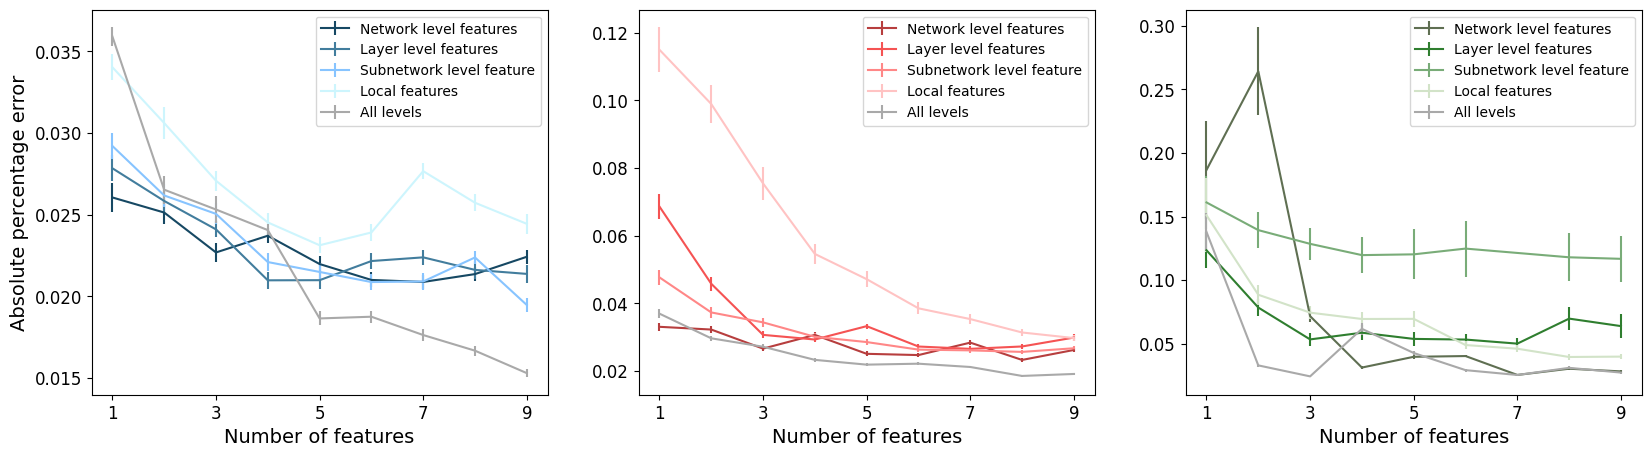

In [16]:
glob_levels =  {
    1: "Network level features",
    0.75: "Layer level features",
    0.5: "Subnetwork level feature",
    0: "Local features"
}
sorted_blues = ["#5D3587",    "#0d88e6", "#4169E1","#8ACDD7",]
sorted_blues = [
"#164863",
    "#427D9D",
    "#87C4FF",
    "#CDF5FD",
]
sorted_rads =[ '#DC143C', '#FF90C2', '#FF6347', '#FF9209']
sorted_rads = [
    "#B73E3E",
"#F55353",
    '#FF8787',
    "#FFC3C3",
     #"#e1a692",
]
sorted_greens = ['#706233', '#228B22',  '#A7D397',  '#D2DE32',]
sorted_greens = ["#5F6F52",
                 '#2f7e2f',
                 "#79AC78",
                 "#D2E3C8", ]
semi_balck='#A9A9A9'
nums= ['A', 'B', 'C']
fig, ax = plt.subplots(1, 3, figsize=(20,5))
for n, (task, sorted_c, j), in enumerate(zip(['retina', "xor", 'digits',], [sorted_blues, sorted_rads, sorted_greens], [0,1,2])):
    for i, ind in enumerate(glob_levels.keys()):
        feature_selection_res_by_glob = res[task]
        res_per_glob = res[task][feature_selection_res_by_glob['glob_ind'] == str(ind)][
            feature_selection_res_by_glob['num_features'] <= 9]
        #plt.plot(res_per_glob['num_features'], res_per_glob['test_mape'], label=f"{glob_levels[float(ind)]}",
         #        c=sorted_c[i])
        ax[j].errorbar(
            res_per_glob['num_features'], y = res_per_glob['test_mape'], yerr = res_per_glob['test_mape_var'], color=sorted_c[i], label=glob_levels[ind])
    small_all_fetaures_selcetion = all_features_res[task][all_features_res[task]['num_features'] <= 9]
    if task =='retina':
            small_all_fetaures_selcetion = all_features_res[task][all_features_res[task]['num_features'] <= 10]
    ax[j].errorbar(
            range(1, 10), y = small_all_fetaures_selcetion['test_mape'], yerr = small_all_fetaures_selcetion['test_mape_var'],label="All levels",
             c=semi_balck)
    ax[0].set_ylabel(f'Absolute percentage error', fontsize=14)
    ax[j].set_xlabel('Number of features', fontsize=14)
    ax[j].set_xticks(range(1,10, 2))
    #ax[j, k].text(-0.05, 1.05, nums[n], transform=ax[j,k].transAxes, fontsize=14, verticalalignment='top', weight="bold")
    #ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
    ax[j].legend()
    #ax1.set_title('train data')
    t = task.capitalize()
    if task == 'xor':
        t = "XOR"
    #plt.title(
     #   f"Performance of an DANN predicting networks’ mean performance with feature selection by globality level - {t}",
      #  wrap=True, fontsize=12)
    ax[j].tick_params(axis='both', labelsize=12)
ax[0].set_ylabel(f'Absolute percentage error', fontsize=14)
plt.savefig(
        f"{plot_path}/{time_str}_all_nn_feature_selection_r2_mape_pres.png",  bbox_inches='tight')
plt.show()

In [ ]:
for k, v in res.items():
    print(k)
    for ind, names in glob_levels.items():
        for i in [1,9]:
            res_per_glob = v[v['glob_ind'] == str(ind)][
                v['num_features'] == i]

            print(names)
            print(round(res_per_glob['test_mape'].item(), 3))
            print(round(res_per_glob['test_mape_var'].item(), 4))



In [ ]:
for k, v in res.items():
    print(k)
    print(all_features_res[k][all_features_res[k]['num_features'] <= 10][['num_features','test mape ind','test mape ind var']])


In [ ]:
res['digits'][res['digits']['glob_ind']=='0.75']

In [ ]:
0.02
v[v['glob_ind'] =='0'][  v['num_features'] == 1]['test_mape']


In [27]:
f"{task_dir}/{sub_folder}/{file}"

'/Volumes/noamaz/modularity//digits/digits_3_layers/lightgbm_feature_selection/by_globality/exp_2023-11-30-12-09-51_nice_features_glob_0/2023-11-30-13-59-29_3_3_feature_selection.csv'

In [29]:
temp

,Unnamed: 0,exp_name,num_features,train_mape,train_mape_var,test_mape,test_mape_var,glob_ind
0,0,2023-11-30-16-19-34_masked_data_100_features,100,0.007611,0.000033,0.024030,0.000599,0
1,1,2023-11-30-13-59-43_masked_data_9_features,9,0.016339,0.000288,0.039861,0.001940,0
2,2,2023-11-30-13-59-43_masked_data_1_features,1,0.151391,0.028975,0.151035,0.029202,0
3,3,2023-11-30-13-59-13_masked_data_4_features,4,0.065168,0.005038,0.069453,0.005629,0
4,4,2023-11-30-13-59-19_masked_data_6_features,6,0.032266,0.001340,0.048971,0.003466,0
5,5,2023-11-30-13-59-19_masked_data_7_features,7,0.025105,0.000735,0.046083,0.002792,0
6,6,2023-11-30-13-59-34_masked_data_2_features,2,0.089057,0.007701,0.088508,0.007797,0
7,7,2023-11-30-13-59-32_masked_data_8_features,8,0.017916,0.000432,0.039572,0.002198,0
8,8,2023-11-30-13-59-13_masked_data_5_features,5,0.058560,0.004364,0.069561,0.006181,0
9,9,2023-11-30-14-05-56_masked_data_50_features,50,0.010891,0.000073,0.024707,0.000475,0


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_27724/1712327041.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = res[task][feature_selection_res_by_glob['glob_ind'] == str(ind)][


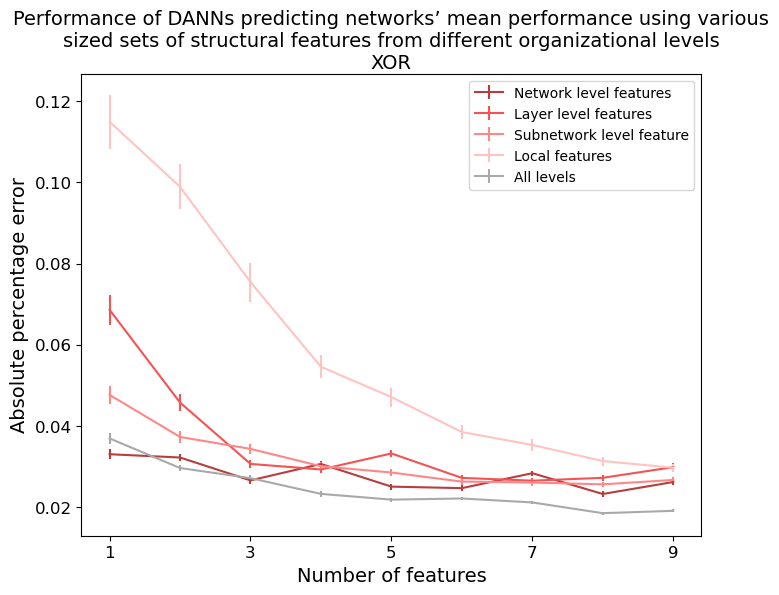

In [43]:
t = "Performance of DANNs predicting networks’ mean performance using various sized sets of structural features from different organizational levels – XOR task"
glob_levels =  {
    1: "Network level features",
    0.75: "Layer level features",
    0.5: "Subnetwork level feature",
    0: "Local features"
}
sorted_blues = ["#5D3587",    "#0d88e6", "#4169E1","#8ACDD7",]
sorted_blues = [
"#164863",
    "#427D9D",
    "#87C4FF",
    "#CDF5FD",
]
sorted_rads =[ '#DC143C', '#FF90C2', '#FF6347', '#FF9209']
sorted_rads = [
    "#B73E3E",
"#F55353",
    '#FF8787',
    "#FFC3C3",
     #"#e1a692",
]
sorted_greens = ['#706233', '#228B22',  '#A7D397',  '#D2DE32',]
sorted_greens = ["#5F6F52",
                 '#2f7e2f',
                 "#79AC78",
                 "#D2E3C8", ]
semi_balck='#A9A9A9'
nums= ['A', 'B', 'C']
fig, ax = plt.subplots(1, 1, figsize=(8,6))
for n, (task, sorted_c, j), in enumerate(zip(['retina', "xor", 'digits',], [sorted_blues, sorted_rads, sorted_greens], [0,1,2])):
    if j != 1:
        continue
    for i, ind in enumerate(glob_levels.keys()):
        feature_selection_res_by_glob = res[task]
        res_per_glob = res[task][feature_selection_res_by_glob['glob_ind'] == str(ind)][
            feature_selection_res_by_glob['num_features'] <= 9]
        #plt.plot(res_per_glob['num_features'], res_per_glob['test_mape'], label=f"{glob_levels[float(ind)]}",
         #        c=sorted_c[i])
        ax.errorbar(
            res_per_glob['num_features'], y = res_per_glob['test_mape'], yerr = res_per_glob['test_mape_var'], color=sorted_c[i], label=glob_levels[ind])
    small_all_fetaures_selcetion = all_features_res[task][all_features_res[task]['num_features'] <= 9]
    if task =='retina':
            small_all_fetaures_selcetion = all_features_res[task][all_features_res[task]['num_features'] <= 10]
    ax.errorbar(
            range(1, 10), y = small_all_fetaures_selcetion['test_mape'], yerr = small_all_fetaures_selcetion['test_mape_var'],label="All levels",
             c=semi_balck)
    ax.set_ylabel(f'Absolute percentage error', fontsize=14)
    ax.set_xlabel('Number of features', fontsize=14)
    ax.set_xticks(range(1,10, 2))
    ax.legend()
    #ax1.set_title('train data')
    ax.set_title(  "Performance of DANNs predicting networks’ mean performance using various\nsized sets of structural features from different organizational levels\nXOR", wrap=True, fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    break
ax.set_ylabel(f'Absolute percentage error', fontsize=14)
plt.savefig(
        f"{plot_path}/{time_str}_all_nn_feature_selection_r2_mape_pres_xor.png", bbox_inches='tight')
plt.show()

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_27724/3593182768.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = res[task][feature_selection_res_by_glob['glob_ind'] == str(ind)][


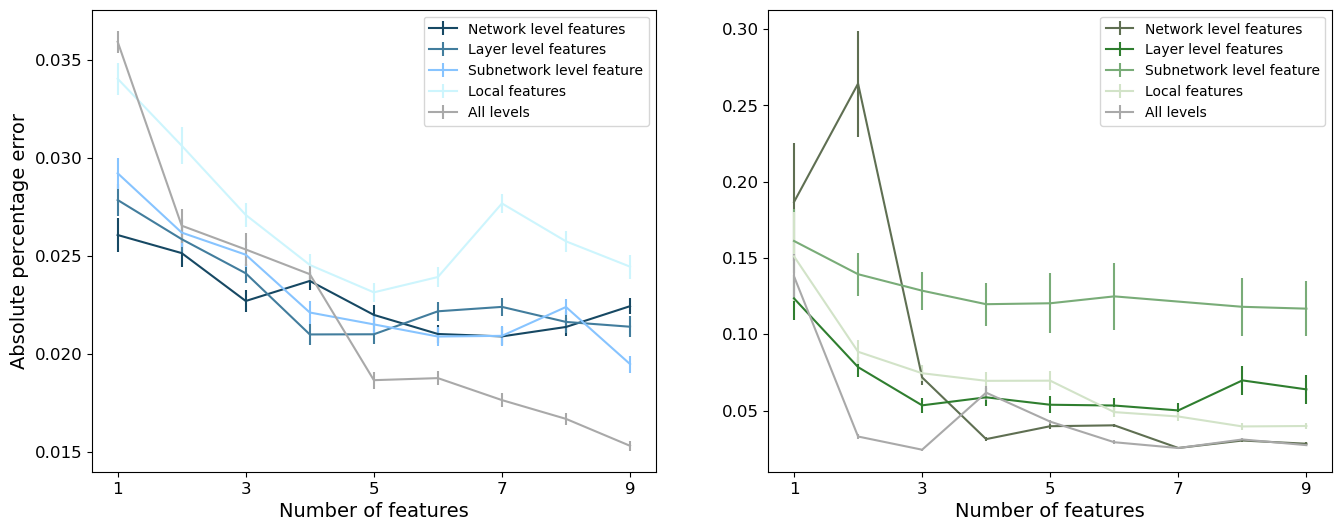

In [52]:
t = "Performance of DANNs predicting networks’ mean performance using various sized sets of structural features from different organizational levels – XOR task"
glob_levels = {
    1: "Network level features",
    0.75: "Layer level features",
    0.5: "Subnetwork level feature",
    0: "Local features"
}
sorted_blues = ["#5D3587", "#0d88e6", "#4169E1", "#8ACDD7", ]
sorted_blues = [
    "#164863",
    "#427D9D",
    "#87C4FF",
    "#CDF5FD",
]
sorted_rads = ['#DC143C', '#FF90C2', '#FF6347', '#FF9209']
sorted_rads = [
    "#B73E3E",
    "#F55353",
    '#FF8787',
    "#FFC3C3",
    #"#e1a692",
]
sorted_greens = ['#706233', '#228B22', '#A7D397', '#D2DE32', ]
sorted_greens = ["#5F6F52",
                 '#2f7e2f',
                 "#79AC78",
                 "#D2E3C8", ]
semi_balck = '#A9A9A9'
nums = ['A', 'B', 'C']
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
for n, (task, sorted_c, j), in enumerate(
        zip(['retina',  'digits', ], [sorted_blues,  sorted_greens], [0, 1, ])):
    for i, ind in enumerate(glob_levels.keys()):
        feature_selection_res_by_glob = res[task]
        res_per_glob = res[task][feature_selection_res_by_glob['glob_ind'] == str(ind)][
            feature_selection_res_by_glob['num_features'] <= 9]
        #plt.plot(res_per_glob['num_features'], res_per_glob['test_mape'], label=f"{glob_levels[float(ind)]}",
        #        c=sorted_c[i])
        ax[j].errorbar(
            res_per_glob['num_features'], y=res_per_glob['test_mape'], yerr=res_per_glob['test_mape_var'],
            color=sorted_c[i], label=glob_levels[ind])
    small_all_fetaures_selcetion = all_features_res[task][all_features_res[task]['num_features'] <= 9]
    if task == 'retina':
        small_all_fetaures_selcetion = all_features_res[task][all_features_res[task]['num_features'] <= 10]
    ax[j].errorbar(
        range(1, 10), y=small_all_fetaures_selcetion['test_mape'], yerr=small_all_fetaures_selcetion['test_mape_var'],
        label="All levels",
        c=semi_balck)
    ax[0].set_ylabel(f'Absolute percentage error', fontsize=14)
    ax[j].set_xlabel('Number of features', fontsize=14)
    ax[j].set_xticks(range(1, 10, 2))
        #ax[j, k].text(-0.05, 1.05, nums[n], transform=ax[j,k].transAxes, fontsize=14, verticalalignment='top', weight="bold")
        #ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
    ax[j].legend()
    ax[j].tick_params(axis='both', labelsize=12)
ax[0].set_ylabel(f'Absolute percentage error', fontsize=14)
plt.savefig(
    f"{plot_path}/{time_str}_all_nn_feature_selection_r2_mape_pres_ret.png", bbox_inches='tight')
plt.show()